In [49]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv("income.csv")
dataframe.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [3]:
## We have all the numerical columns, let's check for Nan values
dataframe.isna()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False


In [4]:
Nan = pd.concat([dataframe.isna().sum()], axis = 1, keys = ["Nan values"])
Nan

## We found that there are no Nan values as well

,Nan values
age,0
fnlwgt,0
education_num,0
capital_gain,0
capital_loss,0
hours_per_week,0
income_level,0


In [5]:
## Let's define feature vs label
features = dataframe.iloc[:,0:6]
label = dataframe.iloc[:,6]

In [6]:
x_train, x_test, y_train, y_test =  train_test_split(features, label, test_size=0.25)

## Adaboost with default configuration

In [47]:
def adaboost_without_config():
    adaboost = AdaBoostClassifier()
    adaboost.fit(x_train, y_train)
    print(adaboost.score(x_test,y_test))
    y_pred = adaboost.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"The accuracy score = {accuracy}")
    return accuracy

In [43]:
adaboost_without_config()

0.8374416509704365
The accuracy score = 0.8374416509704365


0.8374416509704365

## Adaboost with custom configurations

In [26]:
def adaboost_custom_config(n_estimators, learning_rate, base_estimator = adaboost):
    adaboost_custom = AdaBoostClassifier(n_estimators= n_estimators, learning_rate= learning_rate, base_estimator = base_estimator)
    adaboost_custom.fit(x_train, y_train)
    print(f" The score of custom configured adaboost is : {adaboost_custom.score(x_test, y_test)}")
    y_pred = adaboost_custom.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"The accuracy score  of custom configured adaboost is : {accuracy}")
    return accuracy

In [25]:
adaboost_custom_config(10, 0.001)

 The score of custom configured adaboost is : 0.8471869625747277
The accuracy score  of custom configured adaboost is : 0.8471869625747277


## With Adaboost we get an option of changing the base_estimator which can be another classification algorithm as well, we can change it to logistic regression and check right now

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
adaboost_custom_config(50, 0.01 , log_reg)

 The score of custom configured adaboost is : 0.8001801654246171
The accuracy score  of custom configured adaboost is : 0.8001801654246171


In [38]:
### Let's try to plot accuracy results of different hyperparameters
accuracy_results = []
names = []

default_ada = adaboost_without_config()
accuracy_results.append(default_ada)
names.append("default_ada")
ada_with_custom_lr_trees = adaboost_custom_config(20, 0.01)
accuracy_results.append(ada_with_custom_lr_trees)
names.append("ada_with_custom_lr_trees")
ada_with_logreg_estimator = adaboost_custom_config(20,0.01,log_reg)
accuracy_results.append(ada_with_logreg_estimator)
names.append("ada_with_logreg_estimator")
accuracy_results


0.8374416509704365
The accuracy score = 0.8374416509704365
 The score of custom configured adaboost is : 0.8473507493243797
The accuracy score  of custom configured adaboost is : 0.8473507493243797
 The score of custom configured adaboost is : 0.7995250184260093
The accuracy score  of custom configured adaboost is : 0.7995250184260093


[0.8374416509704365, 0.8473507493243797, 0.7995250184260093]

No handles with labels found to put in legend.


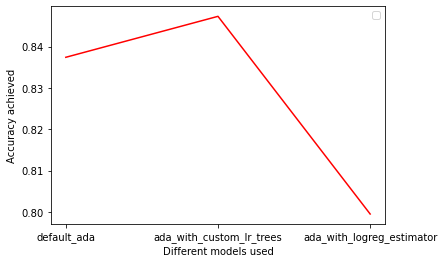

In [40]:
plt.plot(names,accuracy_results,'r')
plt.xlabel("Different models used")
plt.ylabel("Accuracy achieved")
plt.legend()
plt.show()

In [41]:
## Let's do some Hyperparamter tuning

In [55]:
from sklearn.model_selection import GridSearchCV
params = {'learning_rate':[0.01, 0.05, 0.10, 0.25], 'n_estimators':[5,10,15]}

tuning = GridSearchCV(estimator= AdaBoostClassifier() , param_grid=params, scoring=metrics.accuracy_score)

tuning.fit(X=x_train, y=y_train)
tuning.best_params_ , tuning.best_score_ 

({'learning_rate': 0.01, 'n_estimators': 5}, nan)

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
g = GradientBoostingRegressor()